# Authors:
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [40]:
df = pd.read_csv("NYC_CleanedData.csv")

In [41]:
from datetime import datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
df['YEAR'] = pd. DatetimeIndex(df['CMPLNT_FR_DT']).year

In [42]:
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,700381962,2015-05-28,15:00:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,1007522.0,247458.0,25-44,BLACK,M,40.845868,-73.915888,"(40.84586773, -73.915888033)",25-44,WHITE HISPANIC,F,2015
1,593660503,2012-02-20,01:30:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,1000693.0,234939.0,25-44,BLACK,M,40.811522,-73.940601,"(40.811522012, -73.940601181)",25-44,BLACK,F,2012
2,889259677,2012-09-28,09:30:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE-HOUSE,N.Y. POLICE DEPT,1026591.0,259192.0,25-44,BLACK HISPANIC,M,40.878003,-73.846892,"(40.878003133, -73.846891755)",18-24,BLACK HISPANIC,F,2012
3,602484492,2017-03-26,12:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,CHAIN STORE,N.Y. POLICE DEPT,999240.0,169262.0,25-44,WHITE,F,40.631257,-73.945996,"(40.63125716, -73.945996398)",UNKNOWN,UNKNOWN,D,2017
4,331617213,2016-10-13,16:55:00,DANGEROUS DRUGS,COMPLETED,FELONY,MANHATTAN,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,998007.0,230362.0,45-64,BLACK,M,40.798964,-73.950314,"(40.798963998, -73.95031372)",UNKNOWN,UNKNOWN,E,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,807437843,2019-12-22,17:42:00,THEFT OF SERVICES,COMPLETED,MISDEMEANOR,MANHATTAN,TRANSIT - NYC SUBWAY,N.Y. TRANSIT POLICE,980295.0,195926.0,25-44,BLACK,M,40.704456,-74.014266,"(40.70445570500005, -74.01426591999996)",UNKNOWN,UNKNOWN,E,2019
1725047,583274933,2019-12-01,00:01:00,HARRASSMENT 2,COMPLETED,VIOLATION,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,984686.0,209908.0,25-44,BLACK,F,40.742834,-73.998428,"(40.74283378800004, -73.99842802399996)",45-64,BLACK,M,2019
1725048,421479092,2019-12-27,07:56:00,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,MANHATTAN,TRANSIT - NYC SUBWAY,N.Y. TRANSIT POLICE,981615.0,196630.0,25-44,WHITE,M,40.706389,-74.009505,"(40.706388512000046, -74.00950535999993)",UNKNOWN,UNKNOWN,E,2019
1725049,331017091,2019-12-31,22:00:00,HARRASSMENT 2,COMPLETED,VIOLATION,STATEN ISLAND,RESIDENCE-HOUSE,N.Y. POLICE DEPT,936722.0,172119.0,<18,BLACK,F,40.638984,-74.171252,"(40.63898417600007, -74.17125230499995)",<18,BLACK,F,2019


Text(0, 0.5, 'Count')

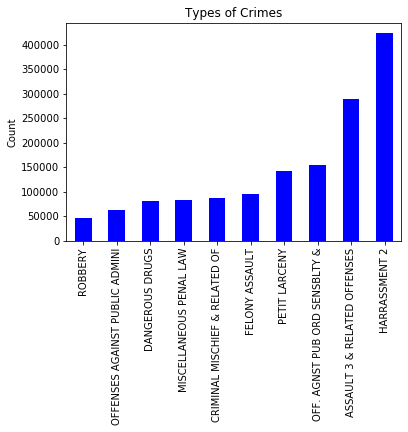

In [43]:

df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="bar", title = "Types of Crimes",color = 'blue')
plt.ylabel('Count')

In [8]:
crime = df.groupby('LAW_CAT_CD')['CMPLNT_NUM'].count()
plot = crime.plot.pie(y='hours',title="Type Of Crime", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=False, startangle=0)
plt.axes().set_ylabel('')

KeyError: 'LAW_CAT_CD'

Text(0.5, 1.0, 'Sex crimes by year')

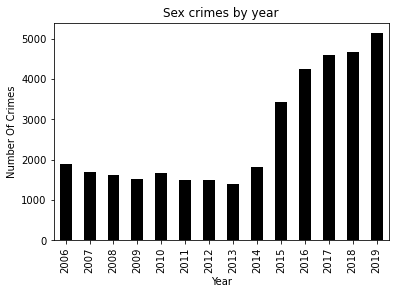

In [7]:
sex_crimes = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]

sex_crimes.groupby("YEAR")['CMPLNT_NUM'].count().plot(kind = "bar",color = 'black')
plt.xlabel('Year')
plt.ylabel("Number Of Crimes")
plt.title("Sex crimes by year")

4


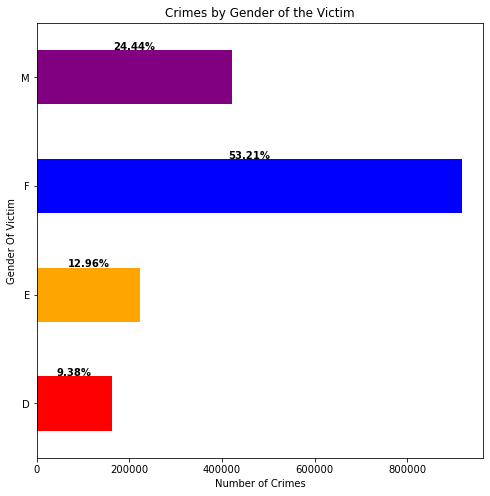

In [11]:
percentage = []
victim = df.groupby("VIC_SEX")['CMPLNT_NUM'].count()
victim = victim[0:4]
print(len(victim))
for i in victim:
    pct = (i / victim.sum()) * 100
    percentage.append(round(pct,2))

# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
result = victim.plot(kind = 'barh',color = colors_list)
plt.title('Crimes by Gender of the Victim')
plt.xlabel('Number of Crimes')
plt.ylabel("Gender Of Victim")
i = 0
for p in result.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

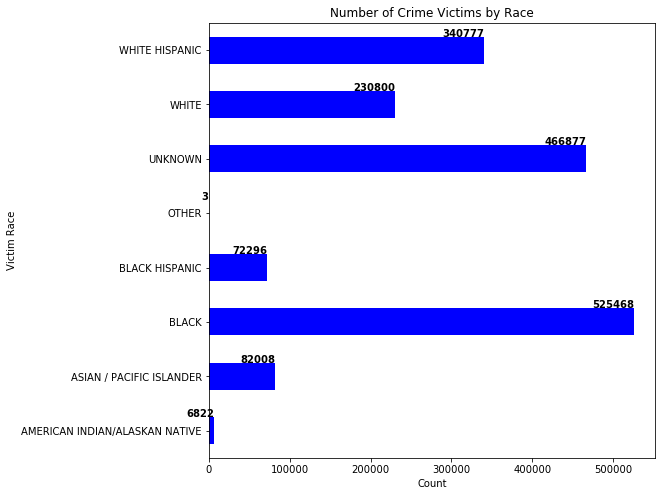

In [34]:
percentage = []
victim = df.groupby("VIC_RACE")['CMPLNT_NUM'].count()
for i in victim:
    percentage.append(i)
 
# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple','yellow','green','brown','pink']
plt.title('Number of Crime Victims by Race')
result = victim.plot(kind = 'barh',color = "blue")
plt.xlabel('Count')
plt.ylabel("Victim Race")
i = 0
for p in result.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width+0.4/2,
             y+height*1.01,
             str(percentage[i]),
             ha='right',
             weight='bold')
    i+=1
plt.show()

In [11]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,100000228,2012-02-08,0 days 18:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,995500.0,149215.0,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,"(40.576237762, -73.959504022)",45-64,WHITE,F,2012
1,100000272,2016-01-31,0 days 00:40:00,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,N.Y. POLICE DEPT,1011263.0,251973.0,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,"(40.858249408, -73.902348526)",UNKNOWN,UNKNOWN,E,2016
2,100000480,2010-01-26,0 days 17:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,1017934.0,232221.0,18-24,WHITE,M,40.804012949000004,-73.878331833,"(40.804012949, -73.878331833)",18-24,WHITE HISPANIC,M,2010
3,100000495,2017-11-24,0 days 20:10:00,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,993511.0,185309.0,45-64,BLACK,M,40.675310519,-73.96661445,"(40.675310519, -73.96661445)",UNKNOWN,UNKNOWN,E,2017
4,100000926,2015-07-12,0 days 14:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,N.Y. POLICE DEPT,997321.0,177773.0,25-44,BLACK,F,40.654621066,-73.952893562,"(40.654621066, -73.952893562)",25-44,ASIAN / PACIFIC ISLANDER,M,2015


7


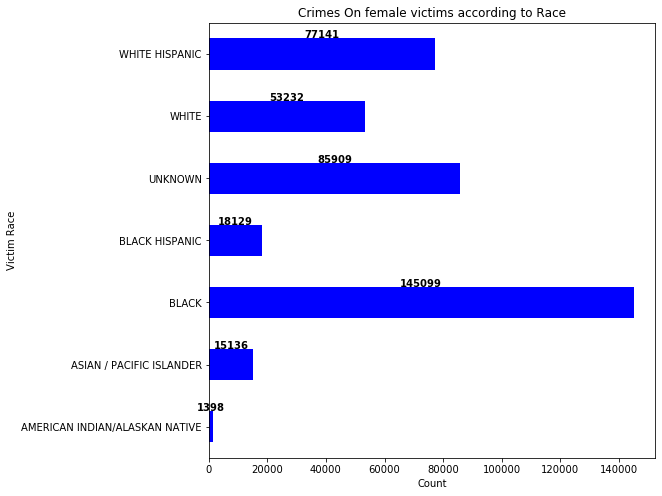

In [39]:
data = df[df.SUSP_SEX == 'F']
percentage = []
victim = data.groupby("VIC_RACE")['CMPLNT_NUM'].count()
print(len(victim))
for i in victim:
    percentage.append(i)

# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['blue']
result = victim.plot(kind = 'barh',color = colors_list)
plt.title('Crimes On female victims according to Race')
plt.xlabel('Count')
plt.ylabel("Victim Race")
i = 0
for p in result.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i]),
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [3]:
year_query.drop(['CMPLNT_NUM', 'JURIS_DESC','X_COORD_CD','Y_COORD_CD','Lat_Lon'], axis=1, inplace=True)

NameError: name 'year_query' is not defined